In [6]:
#import necessary packages
import sys
import numpy as np
import pandas as pd
import matplotlib 
import sklearn
import seaborn as sns
import scipy

In [7]:
import matplotlib.pyplot as plt

In [9]:
#load the dataset using pandas's read_csv method
datafile = pd.read_csv('FraudDetectionData.csv')
print(datafile.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [10]:
print(datafile.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
print(datafile.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [14]:
#sample only fraction of dataset
dataframe = datafile.sample(frac = 0.1, random_state = 1)
print(dataframe.shape)

(28481, 31)


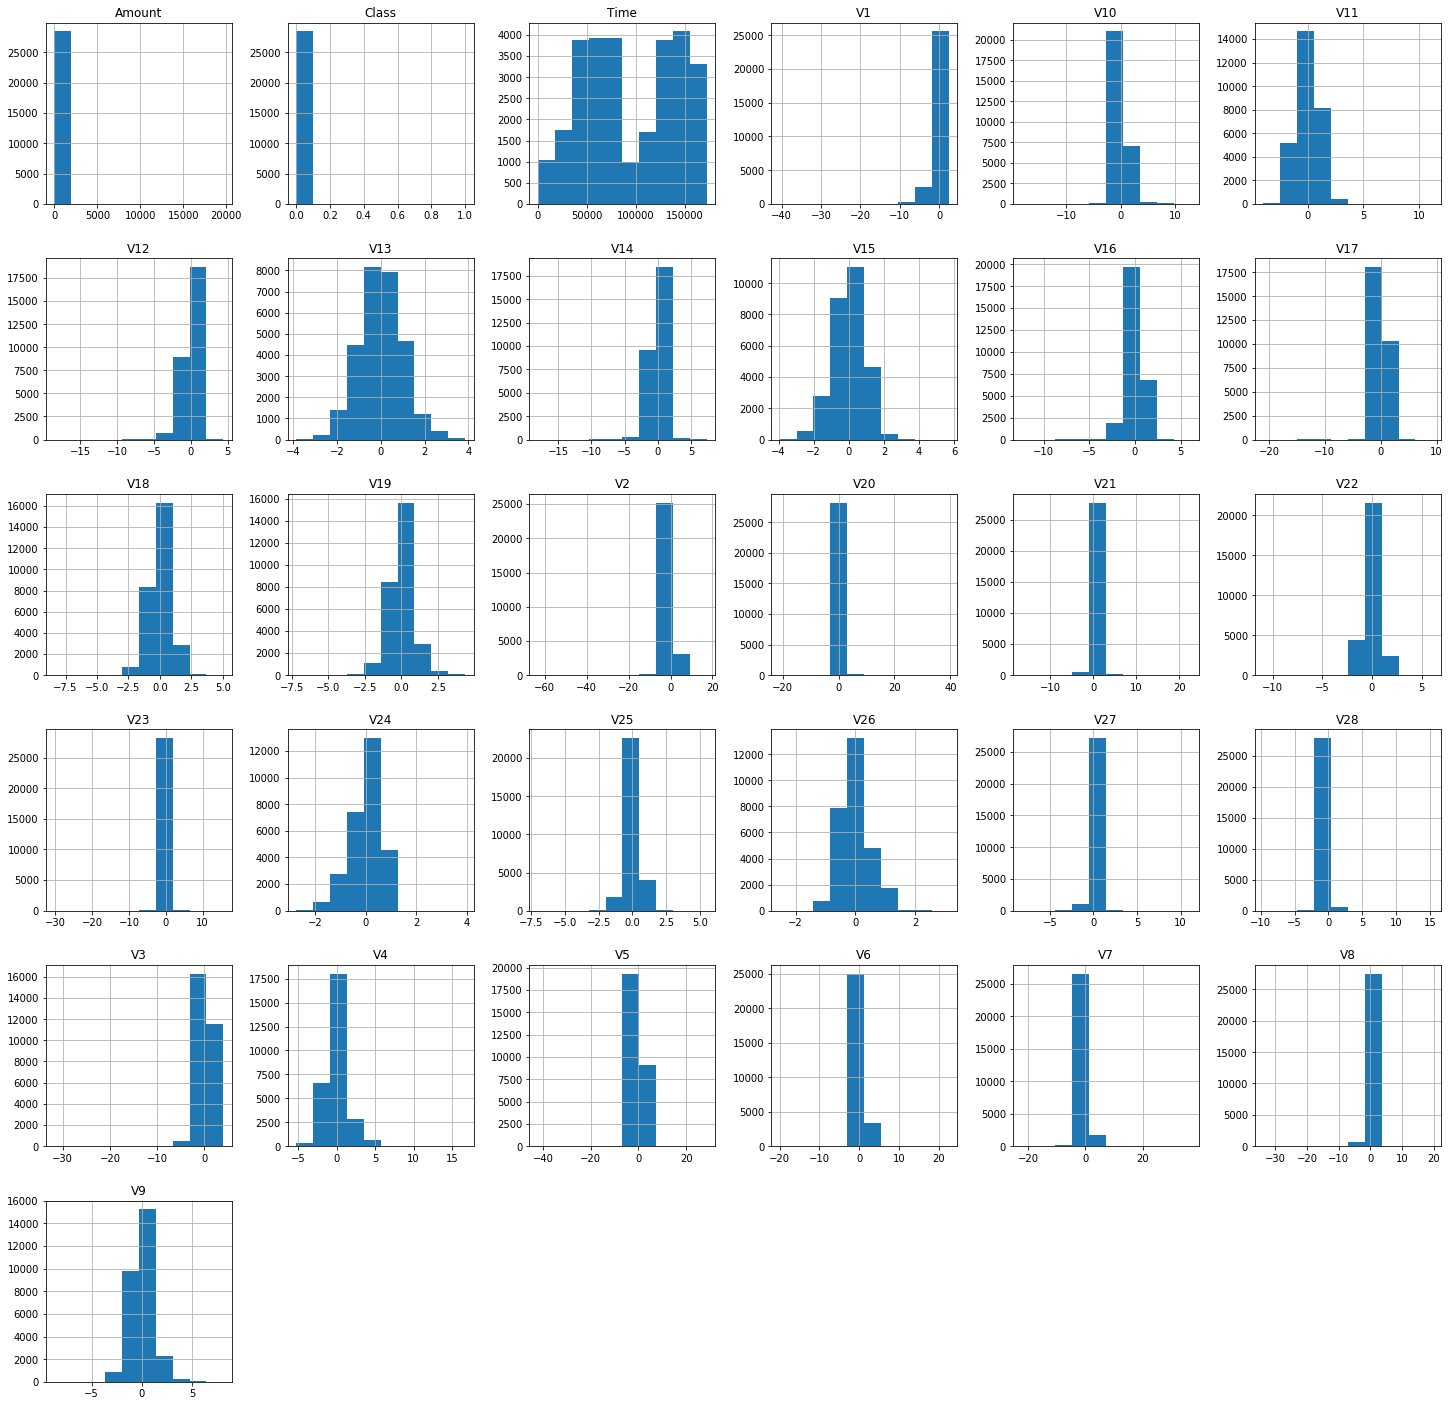

In [15]:
#plot histograms for each feature in the dataset
dataframe.hist(figsize = (25,25))
plt.show()

In [16]:
#Number of frauds in dataset
fraud = dataframe[dataframe['Class'] == 1]
legal = dataframe[dataframe['Class'] == 0]

print("Number of frauds: {}".format(len(fraud)))
print("Number of Legitimates: {}".format(len(legal)))

outlier = len(fraud) / float(len(legal))
print("Outlier Fraction = {}".format(outlier))

Number of frauds: 49
Number of Legitimates: 28432
Outlier Fraction = 0.0017234102419808666


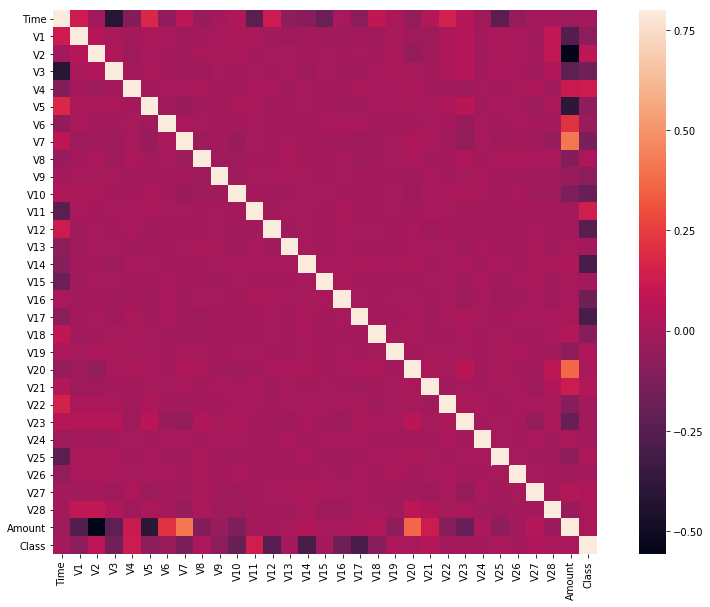

In [17]:
correl = dataframe.corr()
hmap = plt.figure(figsize = (15, 10))

sns.heatmap(correl, vmax = 0.8, square = True)
plt.show()

In [18]:
#Get all the columns from the dataframe
cols = dataframe.columns.tolist()

In [19]:
# remove the "Class" column from the cols dataframe
cols= [i for i in cols if i not in ["Class"]]

target = "Class"

X = dataframe[cols]
Y = dataframe[target]


In [20]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf_DTree = DecisionTreeClassifier()
clf_DTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
prediction = clf_DTree.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
#Score of the Decision Tree for given dataset
score = clf_DTree.score(x_test, y_test)
score

0.9989468141126909

In [51]:
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
clf_adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [52]:
predict_adaboost = clf_adaboost.predict(x_test)
predict_adaboost

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
#Score of the AdaBoost Classifier for given dataset
score1 = clf_adaboost.score(x_test, y_test)
score1

0.9992978760751272

In [56]:
#K-means algorithm begins here:


X = datafile.iloc[:,0:len(datafile.columns)-2].values
amount = datafile.iloc[:,len(datafile.columns)-2:len(datafile.columns)-1].values
y = datafile.iloc[:,len(datafile.columns)-1].values
#print(amount)
#print(y)

In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
X_std = StandardScaler().fit_transform(X)
mean_vector = np.mean(X_std, axis = 0)
cov_mat = (X_std - mean_vector).T.dot((X_std - mean_vector)) / ((X_std.shape[0]-1))

eig_values, eig_vectors = np.linalg.eig(cov_mat)

In [60]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs = sorted(eig_pairs, key = lambda x: x[0])
eig_pairs.reverse()
for i in eig_pairs:
    print(i[0])

1.6841147850523308
1.0000035111620051
1.0000035111619916
1.0000035111619896
1.0000035111619894
1.0000035111619878
1.0000035111619867
1.0000035111619867
1.0000035111619865
1.0000035111619865
1.000003511161986
1.0000035111619856
1.0000035111619852
1.000003511161985
1.0000035111619843
1.000003511161984
1.000003511161984
1.0000035111619836
1.0000035111619836
1.000003511161983
1.0000035111619823
1.0000035111619812
1.0000035111619812
1.0000035111619805
1.0000035111619796
1.000003511161979
1.0000035111619774
1.000003511161959
0.31589223727163884


In [61]:
matrix_reshape =  np.hstack((eig_pairs[0][1].reshape(29,1),
                      eig_pairs[1][1].reshape(29,1),
                      eig_pairs[2][1].reshape(29,1),
                      eig_pairs[3][1].reshape(29,1),
                      eig_pairs[4][1].reshape(29,1),
                      eig_pairs[5][1].reshape(29,1)))

In [62]:
matrix_new = X_std.dot(matrix_reshape)

In [65]:
matrix_final = []
for i,j in zip(matrix_new, amount):
    i = np.append(i, j)
    matrix_final.append(i)

In [66]:
#get the centers
import math
import random

centers = []
for i in range(6):
    a = random.randint(0, len(matrix_final))
    centers.append(matrix_final[a])

In [67]:
clusters = []
for i in centers:
    clusters.append([])

In [69]:
# define euclidean function
def euclidean_dist(x,y):
    count = 0
    for i,j in zip(x,y):
        count += (i - j) * (i - j)
    return math.sqrt(count)

In [70]:
#define function for finding minimum distance
def min_dist(x):
    return x.index(min(x))

In [71]:
# Clustering takes place below
min_list = []
while(True):
    for i in range(len(matrix_final)):
        for j in centers:
            min_list.append(euclidean_dist(matrix_final[i], j))
        l = min_dist(min_list)
        clusters[l].append(i)
        min_list = []
    temp = []
    for i in clusters:
        d = 0
        count = 0
        for j in i:
            d += matrix_final[j]
            count += 1
        temp.append(d/count)
    flag = 1
    for i,j in zip(centers, temp):
        if (i == j).all:
            flag = 0
    if flag == 0:
        break
    centers = np.copy(temp)

In [72]:
#print the clusters
for i in range(len(clusters)):
    print("Clusters {}".format(i+1))
    for j in range(10):
        print(matrix_final[clusters[i][j]])

Clusters 1
[  1.79567516  -0.12728004  -2.59638107  -1.04554872   0.37883479
  -0.92953029 123.5       ]
[ 1.19435676e+00  2.37122219e-01 -3.26151154e-01  6.26751713e-02
 -4.98378132e-01 -2.35442619e-02  9.32000000e+01]
[ 2.13413983e+00 -6.41997781e-01  1.12301970e-01  3.34595910e-01
 -1.43008670e-01 -9.18660159e-01  1.21500000e+02]
[ 1.76901864e+00  1.75797961e-01  8.58321821e-01  1.15685265e-01
  3.23005049e-01 -6.90957071e-02  1.20960000e+02]
[ 1.92829002e+00 -8.49562079e-02 -2.07394748e+00 -5.56369702e-01
  6.12115191e-01 -1.83084417e-01  9.69400000e+01]
[ 2.08965753e+00  8.63458124e-01 -3.95494747e-01  2.57388669e-02
 -8.81668435e-01  3.54546224e-01  1.35510000e+02]
[  1.41984833   0.83096647  -1.99871788  -1.17767263   0.14600398
  -2.03192145 104.94      ]
[ 1.43579325e+00 -4.67777359e-02  5.28178127e-02  1.07580205e+00
 -3.91831700e-01  9.68325248e-01  1.24670000e+02]
[ 2.41985543e+00  1.14747142e+00  3.43491536e-01  3.21033471e-01
  7.22313046e-02 -2.44052577e-01  1.42710000e+

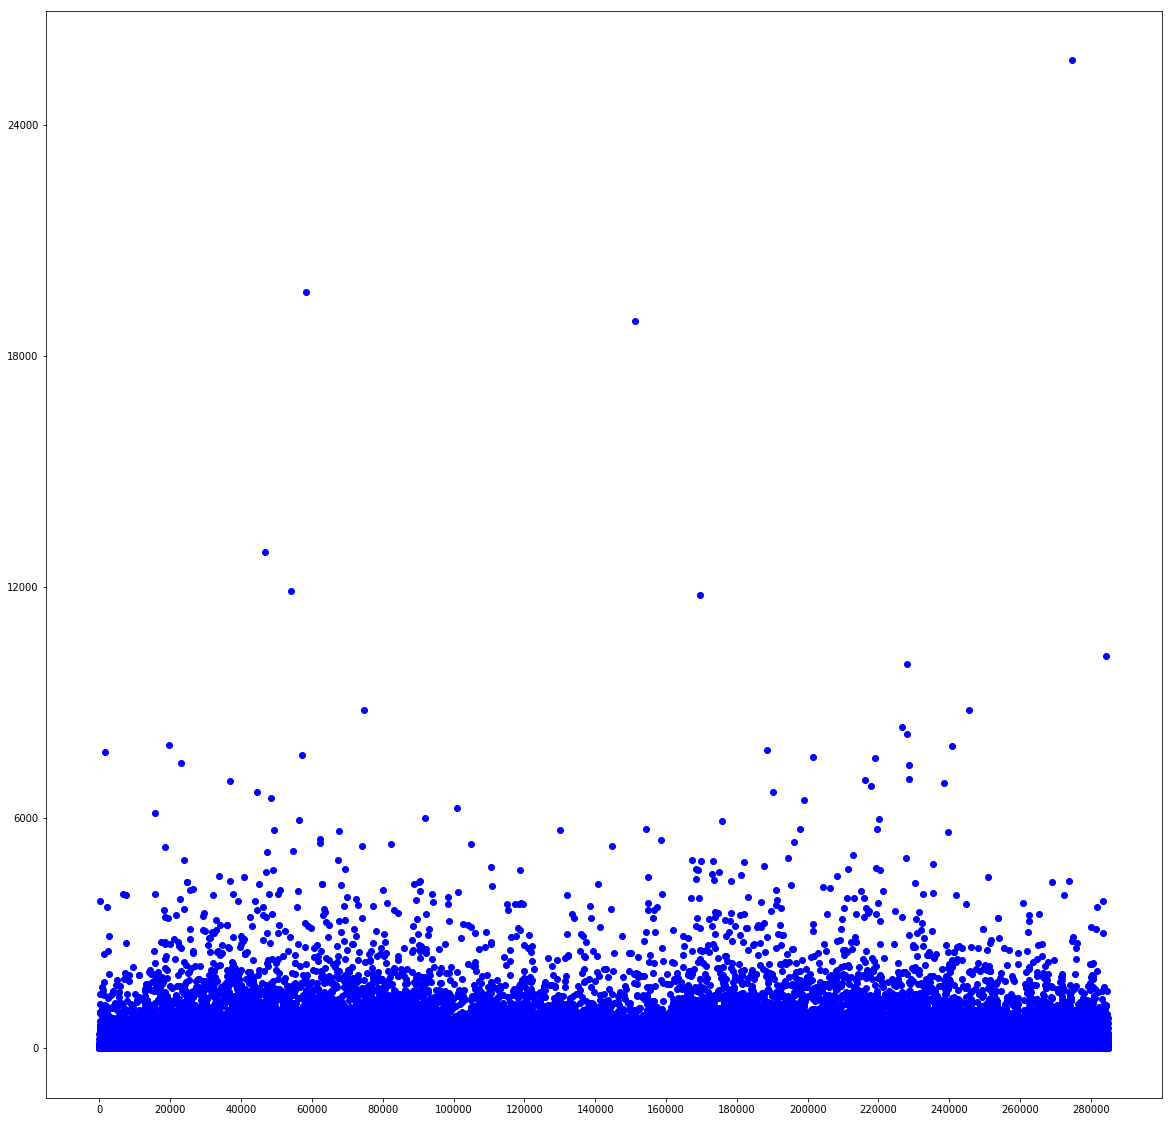

In [73]:
#plot the cluster using scatter plot
temp = []

plt.figure(figsize = (20, 20))
plt.yticks(np.arange(0, 28000, 6000))
plt.xticks(np.arange(0, 284900, 20000))
for i in range(0, len(clusters)):
    for j in clusters[i]:
        temp.append(matrix_final[j][6])
    plt.scatter(clusters[i],temp, color = "blue")
    temp = []